In [122]:
import pandas as pd
import pylab
import xlrd
import csv
import us
import json
import prettytable
import requests
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
from SemanticAnalyzer import *
from plotly.graph_objs import *
from IPython.lib.pretty import pprint
from pandas import *
from pylab import *
from tabulate import tabulate
# Enable inline plotting
#%matplotlib inline

In [123]:
# read in data

#print('--------------')
#metroPop = pd.DataFrame(metroPv, columns=['Metro Area Geography','2010 Population','2011 Population','2012 Population','2013 Population','2014 Population'])
#metroPop.rename(columns={'Metro Area Geography':'Metro Area Geography','2010':'2010 Population','2011':'2011 Population','2012':'2012 Population','2013':'2013 Population','2014':'2014 Population'}, inplace=True)
#crime = read_csv('data/Metropolitan_Crime_Stats.csv')
#crime = pd.DataFrame(crime, columns=['Metropolitan Statistical Area','Violent crime'])
#crime.head()

#pd.options.display.float_format = '{:.3f}'.format
data= read_csv('data/MetroPopulationPovertyLargest20.csv')
#metroPv['% People Below Poverty Level'] = pd.Series(["{0:.2f}%".format(val * 100) for val in metroPv['% People Below Poverty Level']], index = metroPv.index)
#crime.head()
data.head()

,Metro Area Geography,2014 Population,#People Below Poverty Level,% People Below Poverty Level,"Crime Rate Per Every 100,000 Inhabitants",Total Population Change [1],Natural Increase,Births,Deaths,Total,International [2],Domestic,Mortality Rates,Family Sizes,HS Droupout Rate,Region
0,"NewYork-Newark-JerseyCity,NY-NJ-PAMetroArea",20092883,2933561,0.146,406.0,"90,797","105,022","251,368","146,346","-16,011","146,892","-162,903",728.35,0.661,0.147,Northeast
1,"LosAngeles-LongBeach-Anaheim,CAMetroArea",13262220,2334151,0.176,393.0,"86,371","87,827","169,963","82,136","4,523","65,972","-61,449",619.32,0.680,0.214,West
2,"Chicago-Naperville-Elgin,IL-IN-WIMetroArea",9554598,1375862,0.144,0.0,"9,802","49,346","119,405","70,059","-38,405","27,410","-65,815",733.25,0.657,0.128,Midwest
3,"Dallas-FortWorth-Arlington,TXMetroArea",6954330,1043150,0.150,344.7,"131,217","55,875","97,026","41,151","74,176","24,773","49,403",591.73,0.694,0.156,South
4,"Houston-TheWoodlands-SugarLand,TXMetroArea",6490180,1064390,0.164,561.5,"156,371","57,776","94,872","37,096","98,133","32,283","65,850",571.57,0.708,0.180,South


                                                                                            % People Below Poverty Level
Metro Area Geography                           2014 Population #People Below Poverty Level                              
Riverside-SanBernardino-Ontario,CAMetroArea    4441890         808424                                              0.182
Miami-FortLauderdale-WestPalmBeach,FLMetroArea 5929819         1049578                                             0.177
LosAngeles-LongBeach-Anaheim,CAMetroArea       13262220        2334151                                             0.176
Phoenix-Mesa-Scottsdale,AZMetroArea            4489109         790083                                              0.176
Detroit-Warren-Dearborn,MIMetroArea            4296611         726127                                              0.169
Houston-TheWoodlands-SugarLand,TXMetroArea     6490180         1064390                                             0.164
Atlanta-SandySprings-Roswell,GAM

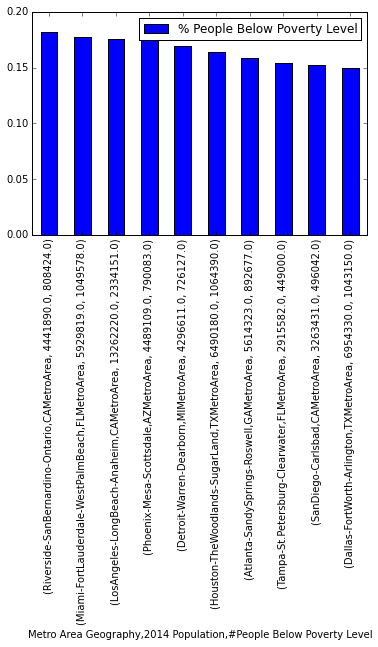

In [149]:
#Displaying Poverty Stats Top 10
metrot5 = pd.DataFrame(data.groupby(['Metro Area Geography','2014 Population','#People Below Poverty Level'])['% People Below Poverty Level'].max().order(ascending=False)[0:10])
#metrot5['% People Below Poverty Level'] = pd.Series(["{0:.2f}%".format(val * 100) for val in metrot5['% People Below Poverty Level']], index = metrot5.index)
pprint (metrot5)
metrot5.plot(kind='bar')

                                                    Crime Rate Per Every 100,000 Inhabitants
Metro Area Geography                                                                        
Baltimore-Columbia-Towson,MDMetroArea                                                  646.2
Miami-FortLauderdale-WestPalmBeach,FLMetroArea                                         596.7
Detroit-Warren-Dearborn,MIMetroArea                                                    573.8
Houston-TheWoodlands-SugarLand,TXMetroArea                                             561.5
Philadelphia-Camden-Wilmington,PA-NJ-DE-MDMetro...                                     532.3
SanFrancisco-Oakland-Hayward,CAMetroArea                                               508.3
St.Louis,MO-ILMetroArea                                                                495.4
Tampa-St.Petersburg-Clearwater,FLMetroArea                                             435.2
NewYork-Newark-JerseyCity,NY-NJ-PAMetroArea                           

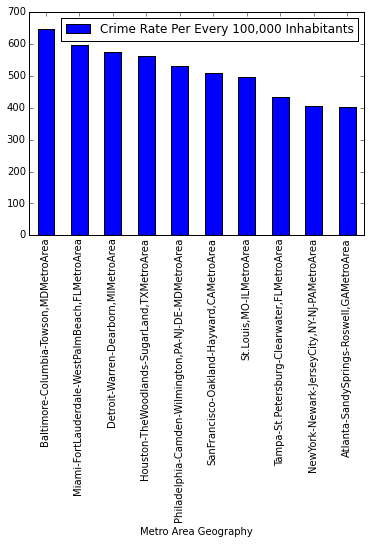

In [148]:
#Displaying Crime Stats Top 10
metroCrime = pd.DataFrame(data.groupby(['Metro Area Geography'])['Crime Rate Per Every 100,000 Inhabitants'].max().order(ascending=False)[0:10])
pprint (metroCrime)
metroCrime.plot(kind='bar')

                                                    Mortality Rates
Metro Area Geography                                               
Tampa-St.Petersburg-Clearwater,FLMetroArea                  1049.29
Detroit-Warren-Dearborn,MIMetroArea                          917.63
St.Louis,MO-ILMetroArea                                      907.20
Philadelphia-Camden-Wilmington,PA-NJ-DE-MDMetro...           895.35
Baltimore-Columbia-Towson,MDMetroArea                        880.15
Miami-FortLauderdale-WestPalmBeach,FLMetroArea               830.11
Boston-Cambridge-Newton,MA-NHMetroArea                       753.50
Chicago-Naperville-Elgin,IL-IN-WIMetroArea                   733.25
Charlotte-Concord-Gastonia,NC-SCMetroArea                    732.93
NewYork-Newark-JerseyCity,NY-NJ-PAMetroArea                  728.35


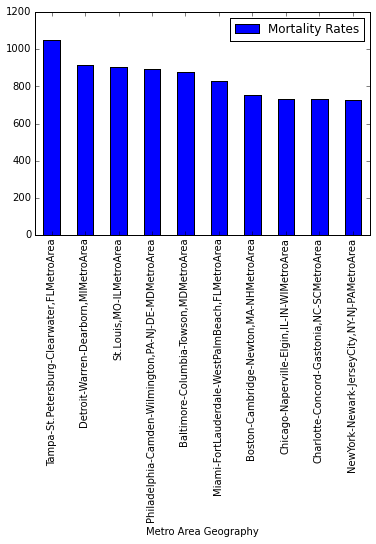

In [147]:
#Displaying Mortality Stats Top 10
metroMortality = pd.DataFrame(data.groupby(['Metro Area Geography'])['Mortality Rates'].max().order(ascending=False)[0:10])
pprint (metroMortality)
metroMortality.plot(kind='bar')

                                                HS Droupout Rate
Metro Area Geography                                            
LosAngeles-LongBeach-Anaheim,CAMetroArea                   0.214
Riverside-SanBernardino-Ontario,CAMetroArea                0.204
Houston-TheWoodlands-SugarLand,TXMetroArea                 0.180
Dallas-FortWorth-Arlington,TXMetroArea                     0.156
Miami-FortLauderdale-WestPalmBeach,FLMetroArea             0.153
NewYork-Newark-JerseyCity,NY-NJ-PAMetroArea                0.147
SanFrancisco-Oakland-Hayward,CAMetroArea                   0.145
Phoenix-Mesa-Scottsdale,AZMetroArea                        0.135
Charlotte-Concord-Gastonia,NC-SCMetroArea                  0.131
Chicago-Naperville-Elgin,IL-IN-WIMetroArea                 0.128


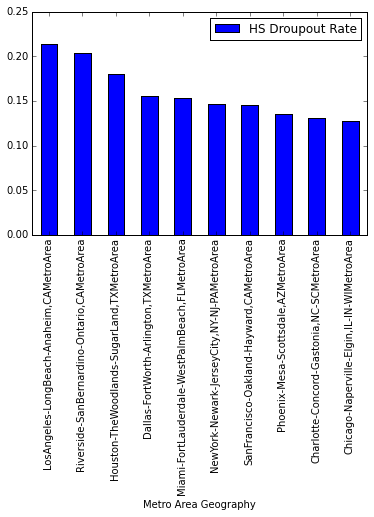

In [139]:
#Displaying Highschool Dropout Stats Top 10
metroHs = pd.DataFrame(data.groupby(['Metro Area Geography'])['HS Droupout Rate'].max().order(ascending=False)[0:10])
#metroHs['HS Droupout Rate'] = pd.Series(["{0:.2f}%".format(val * 100) for val in metroHs['HS Droupout Rate']], index = metroHs.index)
pprint (metroHs)
metroHs.plot(kind='bar')

                                                    Family Sizes
Metro Area Geography                                            
Riverside-SanBernardino-Ontario,CAMetroArea                0.744
Houston-TheWoodlands-SugarLand,TXMetroArea                 0.708
Dallas-FortWorth-Arlington,TXMetroArea                     0.694
LosAngeles-LongBeach-Anaheim,CAMetroArea                   0.680
Atlanta-SandySprings-Roswell,GAMetroArea                   0.673
Charlotte-Concord-Gastonia,NC-SCMetroArea                  0.672
SanFrancisco-Oakland-Hayward,CAMetroArea                   0.667
Washington-Arlington-Alexandria,DC-VA-MD-WVMetr...         0.664
Phoenix-Mesa-Scottsdale,AZMetroArea                        0.663
NewYork-Newark-JerseyCity,NY-NJ-PAMetroArea                0.661


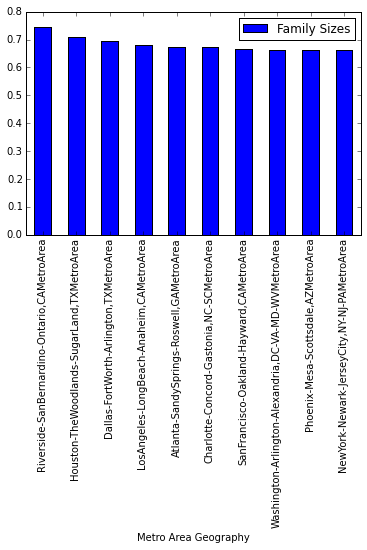

In [137]:
#Displaying Family Size Stats Top 10
metroFS = pd.DataFrame(data.groupby(['Metro Area Geography'])['Family Sizes'].max().order(ascending=False)[0:10])
pprint (metroFS)
metroFS.plot(kind='bar')

In [152]:
#Displaying All Stats 
metroAll = pd.DataFrame(data,columns=['Metro Area Geography','% People Below Poverty Level','Crime Rate Per Every 100,000 Inhabitants','Mortality Rates','Family Sizes','HS Droupout Rate'])
metroAll.head(10)
                   

,Metro Area Geography,% People Below Poverty Level,"Crime Rate Per Every 100,000 Inhabitants",Mortality Rates,Family Sizes,HS Droupout Rate
0,"NewYork-Newark-JerseyCity,NY-NJ-PAMetroArea",0.146,406.0,728.35,0.661,0.147
1,"LosAngeles-LongBeach-Anaheim,CAMetroArea",0.176,393.0,619.32,0.680,0.214
2,"Chicago-Naperville-Elgin,IL-IN-WIMetroArea",0.144,0.0,733.25,0.657,0.128
3,"Dallas-FortWorth-Arlington,TXMetroArea",0.150,344.7,591.73,0.694,0.156
4,"Houston-TheWoodlands-SugarLand,TXMetroArea",0.164,561.5,571.57,0.708,0.180
5,"Philadelphia-Camden-Wilmington,PA-NJ-DE-MDMetr...",0.135,532.3,895.35,0.640,0.105
6,"Washington-Arlington-Alexandria,DC-VA-MD-WVMet...",0.085,334.6,566.48,0.664,0.095
7,"Miami-FortLauderdale-WestPalmBeach,FLMetroArea",0.177,596.7,830.11,0.651,0.153
8,"Atlanta-SandySprings-Roswell,GAMetroArea",0.159,400.9,624.17,0.673,0.118
9,"Boston-Cambridge-Newton,MA-NHMetroArea",0.104,374.7,753.50,0.636,0.088
